In [1]:
#Nama : Diki Taufik Gurohman Mahasiswa Politeknik Negeri Jember
#import semua library
import tensorflow as tf
import zipfile,os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
#download data.zip
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-27 14:20:31--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.00MB/s    in 83s     

2020-10-27 14:21:55 (3.73 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#extract zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [4]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
os.remove('/tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt')

train_dir = os.path.join(base_dir, 'train_dir')
val_dir = os.path.join(base_dir, 'val_dir')
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')
paper_dir = os.path.join(base_dir, 'paper')

os.mkdir(train_dir)
os.mkdir(val_dir)

In [5]:
#training
train_rock = os.path.join(train_dir, 'rock')
train_scissors = os.path.join(train_dir, 'scissors')
train_paper = os.path.join(train_dir, 'paper')

#validation
validation_rock = os.path.join(val_dir, 'rock')
validation_scissors = os.path.join(val_dir, 'scissors')
validation_paper = os.path.join(val_dir, 'paper')

In [6]:
#create direktori training
os.mkdir(train_rock)
os.mkdir(train_scissors)
os.mkdir(train_paper)

#create direktori validation
os.mkdir(validation_rock)
os.mkdir(validation_scissors)
os.mkdir(validation_paper)

In [7]:
#split data menjadi data training dan validation(val=40%)
train_rock_dir, validation_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.40)
train_scissors_dir, validation_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size=0.40)
train_paper_dir, validation_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.40)

In [8]:
import shutil
#training
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(train_scissors, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(train_paper, file))
#validation
for file in validation_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(validation_rock, file))
for file in validation_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(validation_scissors, file))
for file in validation_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(validation_paper, file))

In [43]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    zoom_range=0.5,
                    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 20,
                horizontal_flip = True,
                shear_range = 0.2,
                zoom_range=0.5,
                fill_mode = 'nearest'
)

In [44]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (150, 150), 
        batch_size = 32,
        class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size = (150, 150),
        batch_size = 32,
        class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [45]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99% accuracy overfitting")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])



In [47]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [48]:
history = model.fit(
    train_generator,
      steps_per_epoch=41,  # berapa step * batch = 1312
      epochs=20,
      validation_data=validation_generator, 
      validation_steps=27,  # berapa step * batch  = 876
      verbose=2,
      callbacks=[callbacks]
)

Epoch 1/20
41/41 - 75s - loss: 1.0989 - accuracy: 0.4184 - val_loss: 0.8806 - val_accuracy: 0.5949
Epoch 2/20
41/41 - 75s - loss: 0.7994 - accuracy: 0.6463 - val_loss: 0.5476 - val_accuracy: 0.7870
Epoch 3/20
41/41 - 75s - loss: 0.5307 - accuracy: 0.7919 - val_loss: 0.4657 - val_accuracy: 0.8021
Epoch 4/20
41/41 - 75s - loss: 0.4432 - accuracy: 0.8163 - val_loss: 0.3547 - val_accuracy: 0.8472
Epoch 5/20
41/41 - 77s - loss: 0.3519 - accuracy: 0.8483 - val_loss: 0.3236 - val_accuracy: 0.8600
Epoch 6/20
41/41 - 74s - loss: 0.3022 - accuracy: 0.8727 - val_loss: 0.2741 - val_accuracy: 0.8866
Epoch 7/20
41/41 - 74s - loss: 0.2117 - accuracy: 0.9192 - val_loss: 0.1141 - val_accuracy: 0.9618
Epoch 8/20
41/41 - 75s - loss: 0.1849 - accuracy: 0.9299 - val_loss: 0.1698 - val_accuracy: 0.9444
Epoch 9/20
41/41 - 74s - loss: 0.1759 - accuracy: 0.9375 - val_loss: 0.1313 - val_accuracy: 0.9525
Epoch 10/20
41/41 - 75s - loss: 0.1374 - accuracy: 0.9497 - val_loss: 0.1064 - val_accuracy: 0.9630
Epoch 11/

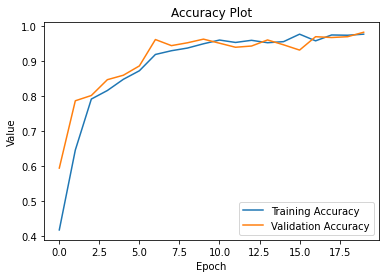

In [49]:
#accuracy training dan validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving 5inLBb6qZY0gpX3b.png to 5inLBb6qZY0gpX3b (5).png
Saving cI2tl5vM2koXZPfG.png to cI2tl5vM2koXZPfG (5).png
Saving lb0hZJ95AjtXzoHf.png to lb0hZJ95AjtXzoHf (4).png
5inLBb6qZY0gpX3b.png
scissors
cI2tl5vM2koXZPfG.png
paper
lb0hZJ95AjtXzoHf.png
rock


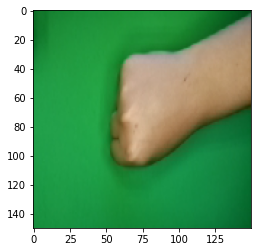

In [52]:
#main driver
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)

  if classes[0][0]==1.0:
    print('paper')
  elif classes[0][1] ==1.0:
    print('rock')
  else:
    print('scissors')